## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [1]:
# Set the working directory
import os
os.chdir(r"C:\\Users\\Goutham-ROG\\Documents\\1-Codes\\Python - codes\\IML(Numpy)\\Class exercises")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

#### 1. Summaries and Aggregates

In [5]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [22]:
cars.describe(include = object)#data about categorical variable

,Car,Origin
count,406,406
unique,308,3
top,Toyota Corolla,US
freq,9,254


In [7]:
#gives both numeric and categ data
cars.describe(include='all')

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
count,406,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406
unique,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Toyota Corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254
mean,NaN,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182,NaN
std,NaN,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737,NaN
min,NaN,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,NaN
25%,NaN,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000,NaN
50%,NaN,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000,NaN
75%,NaN,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,NaN


What do u interpret from the above data,<br/>
1)looking at mean. and std. of MPG -> normally distribued or chebyshev rule<br/>
2)Form min. of MPG = 0, is this an anamoly? (or is it electric)<br/>
3)min(HP) = 0,missing or anamoly? perform a cross check.<br/>
If you can find the missing values, replug those correct values or ommit them(disadvantage:missing info)<br/>
4)look for more Insights!!<br/>
Outliers may be true value as well.(dont delete it..recheck it twice)




In [8]:
#will mean change becoz of anamoly?
import numpy as np

In [9]:
a = np.random.randint(0,10,10) #we have 10 values in array
a = np.append(a,100) #anamoly
a.mean()

14.545454545454545

In [11]:
a = np.random.randint(0,10,1000) #we have 1000 values(more data) in array
a = np.append(a,100) #anamoly
a.mean() #mean doesnt move that much
#the distribution is jus skwed.!! remember this.

4.749250749250749

In [20]:
cars[["MPG","Weight"]].mean() 

MPG         23.051232
Weight    2979.413793
dtype: float64

In [15]:
cars[["MPG","Weight"]].std()  
#hw can u compare this?
#st.dev are not comparable bcoz their mean are differnt
#comparison of st.dev can be done by using co.eff of st.dev

MPG         8.401777
Weight    847.004328
dtype: float64

In [12]:
#A. Aggregates - groupby() method
cars[["MPG","Weight","Origin"]].groupby(["Origin"]).mean()

,MPG,Weight
Origin,,
Europe,26.745205,2431.493151
Japan,30.450633,2221.227848
US,19.688189,3372.700787


In [18]:
cars[["MPG","Weight","Origin"]].groupby(["Origin"]).median()

,MPG,Weight
Origin,,
Europe,26.00,2246.0
Japan,31.60,2155.0
US,18.35,3380.5


From above data<br/>
Japan produces more efficent cars<br/>
More MPG, Less weight

In [19]:
cars[["MPG","Weight","Origin"]].groupby(["Origin"]).describe()

MPG                                                       Weight  \
        count       mean       std   min   25%    50%     75%   max  count   
Origin                                                                       
Europe   73.0  26.745205  8.626075   0.0  23.0  26.00  30.500  44.3   73.0   
Japan    79.0  30.450633  6.090048  18.0  25.7  31.60  34.050  46.6   79.0   
US      254.0  19.688189  6.928290   0.0  15.0  18.35  23.975  39.0  254.0   

                                                                           
               mean         std     min      25%     50%      75%     max  
Origin                                                                     
Europe  2431.493151  490.883617  1825.0  2065.00  2246.0  2800.00  3820.0  
Japan   2221.227848  320.497248  1613.0  1985.00  2155.0  2412.50  2930.0  
US      3372.700787  791.695866  1800.0  2721.25  3380.5  4054.75  5140.0

#### 2. Tables (Crosstabs)
Use Proportion for Categorical data

In [23]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin,columns="counts")
tab

col_0,counts
Origin,
Europe,73
Japan,79
US,254


In [24]:
type(tab)

pandas.core.frame.DataFrame

In [25]:
tab.sum()

col_0
counts    406
dtype: int64

In [27]:
#B. Univariate table of proportion
tab/tab.sum()

col_0,counts
Origin,
Europe,0.179803
Japan,0.194581
US,0.625616


In [28]:
#B. Univariate table of percentage
round(tab/tab.sum()*100,2)

col_0,counts
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [30]:
#C. Bi-variate Frequency Distribution Table
pd.crosstab(cars.Origin , columns=cars.Cylinders)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


The above data give u correlation <br/>
Off all the cars, which has 8 cylinders -> originated from US<br/>
all the 3 cylinder cars are from only japan.<br/>

In [37]:
#Re-Naming the Rows and Columns
table = pd.crosstab(cars.Origin , columns=cars.Cylinders)
table.columns = ["Cyl3","Cyl4","Cyl5","Cyl6","Cyl8"]
table.index = ["EU","JP","US"]
table

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0,66,3,4,0
JP,4,69,0,6,0
US,0,72,0,74,108


In [38]:
#Finding the col-sums
table = pd.crosstab(cars.Origin , columns=cars.Cylinders)
print(table.columns)
print(table.index)

Int64Index([3, 4, 5, 6, 8], dtype='int64', name='Cylinders')
Index(['Europe', 'Japan', 'US'], dtype='object', name='Origin')


In [36]:
#Finding the row sums
#we fix the row and add up all the columns
coltotal = table.sum(axis=0) #default axis is set to col
print(coltotal)
#now fixing col and adding up rows
rowtotal = table.sum(axis= 1)
print('\n',rowtotal)

Cylinders
3      4
4    207
5      3
6     84
8    108
dtype: int64

 Origin
Europe     73
Japan      79
US        254
dtype: int64


In [39]:
#D. Table of joint proportion
round(table/sum(rowtotal),2)*100

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,16.0,1.0,1.0,0.0
Japan,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


What does 16% tell u?<br/>
n(origin = Eu and cyl = 4)/n(cars) = 66/406<br/>
so 16% pof the total cars orginated from Eu and have 4 cylinders

In [42]:
#OR
table/sum(coltotal)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [43]:
#E. Table of conditional proportion (Conditioned on rows)
#conditinal probabilty
#n(origin = Eu and cyl = 4) given tht n(origin = EU)

table.div(rowtotal, axis=0)

#66/73 =90.4110% 

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [44]:
#F. Table of conditional proportion (conditioned on columns)
#p(origis given Cyl)
table.div(coltotal ,axis =1)
#Uses:
# all 5 cylinders have originated only from Eu
# all 8 cylinders have originated only form US

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,0.318841,1.0,0.047619,0.0
Japan,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


#### 3. Graphs

In [2]:
import matplotlib.pyplot as plt

#### 3A. Histograms

Discrete variable--> If a variable can take only some specific value in that range.<br/>
<br/>
Continuous variable---> if a variable can take any value in that range.

#### Is the variable Discrete or Continuous?
Ask these questions to yourself!!<br/>
step 1: What is the range of the variable? <br/>
step 2 : Can the variable take all vlaues within the range?<br/>


In [6]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

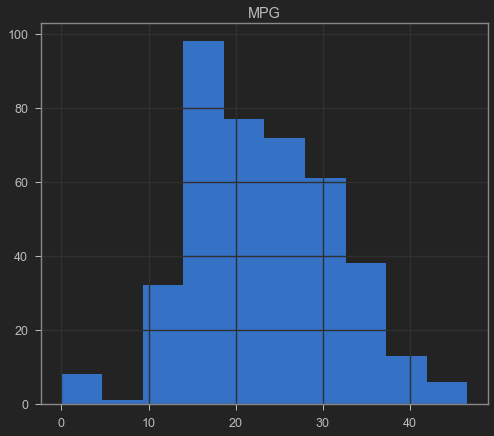

In [3]:
#categorical variable - bar plot

#histogram of MPG -continuous variable
cars.hist(column="MPG")
plt.show()

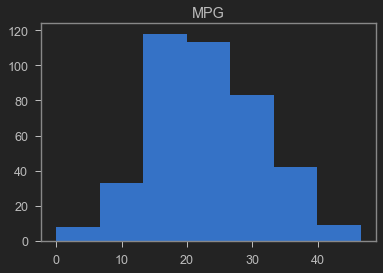

In [17]:
#Additional arguments: 
cars.hist(column= "MPG",
         grid = False,
         figsize= (6,4),  #lenth, height of the plt in inches
         bins = 7)
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

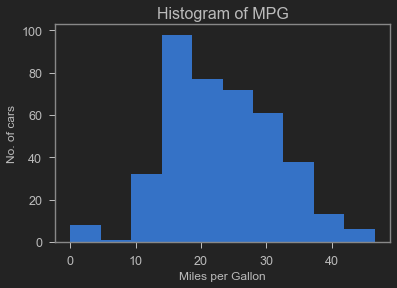

In [19]:
#Labelling the axes and giving the title
cars.hist(column= "MPG",
         grid = False,
         figsize= (6,4),  #lenth, height of the plt in inches
         bins = 10)

plt.xlabel("Miles per Gallon",fontsize = 12)
plt.ylabel("No. of cars",fontsize = 12)
plt.title("Histogram of MPG", fontsize= 16)

plt.show()

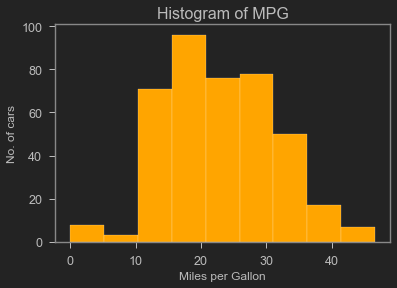

In [22]:
#Editing color and edgecolor
cars.hist(column= "MPG",
         grid = False,
         figsize= (6,4),
         color = "Orange",
         edgecolor = "White",
         bins = 9)
plt.xlabel("Miles per Gallon",fontsize = 12)
plt.ylabel("No. of cars",fontsize = 12)
plt.title("Histogram of MPG", fontsize= 16)

plt.show()

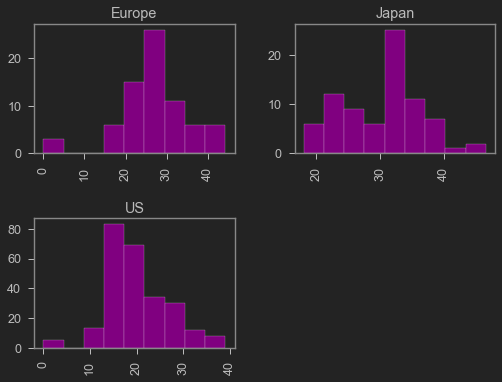

In [34]:
#Breaking up by the categories of a categorical variable
#Editing color and edgecolor
cars.hist(column= "MPG",
          by = "Origin",  #categorical variable
          grid = False,
          figsize= (8,6),
          color = "purple",
          edgecolor = "White",
          bins = 9)
plt.yticks([10,20,30,40,50])
plt.xlabel("Miles per Gallon",fontsize = 12)
plt.ylabel("No. of cars",fontsize = 12)
plt.title("Histogram of MPG", fontsize= 16)

plt.show()

#### 3B. Boxplots

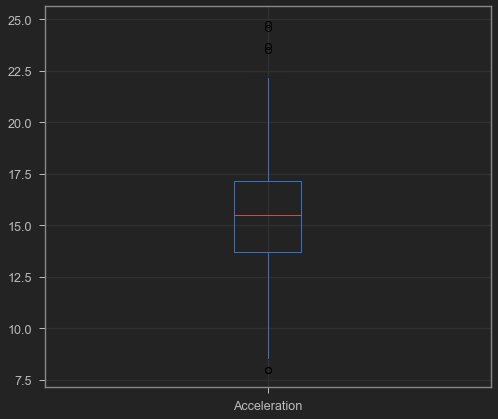

In [44]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column="Acceleration")
plt.show()
#shows details about quartiles.

Upper bound = min(largest value, Q3 + 105*IQR) <br/>
LB = max(smallest value, Q1 - 1.5*IQR)

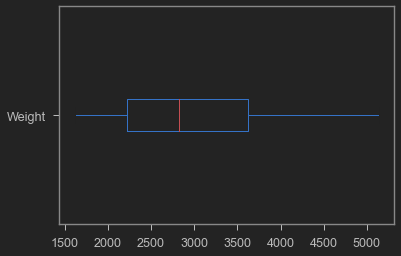

In [39]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column="Weight",
             grid= False,
             vert = False,
             figsize= (6,4))
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

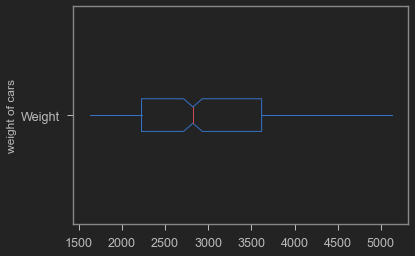

In [47]:
#Labelling the boxplot
cars.boxplot(column="Weight", notch = True, #to get hte notch
             grid= False,
             vert = False,
             figsize= (6,4))
plt.ylabel("weight of cars",fontsize =12)
plt.show()

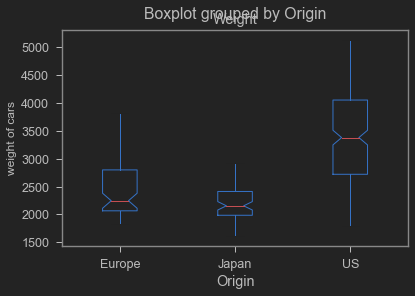

In [52]:
#Side by Side boxplot
cars.boxplot(column="Weight",
             by= "Origin",
             notch = True, 
             grid= False,
             vert = True,
             figsize= (6,4))
plt.ylabel("weight of cars",fontsize =12)

plt.show()

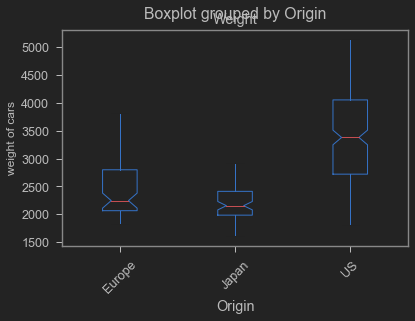

In [54]:
#The rotation argument
#Side by Side boxplot
#Side by Side boxplot
cars.boxplot(column="Weight",
             by= "Origin",
             notch = True, 
             grid= False,
             vert = True,
             figsize= (6,4),
             rot = 45) #rotates the name on origin
plt.ylabel("weight of cars",fontsize =12)

plt.show()

#### 3C. Bar Plots

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

In [ ]:
#Scatter plot 


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

In [ ]:
#Pairwise Scatterplot


In [ ]:
#Exporting Graph



## Part 2 - Data Manipulation

#### 1. Sorting

In [ ]:
#Sort the data in ascending order of MPG


In [ ]:
#Sort the data in descending order of MPG


In [ ]:
#Sort the data in descending order of Origin and then by increasing order of MPG


In [ ]:
#Saving in another data frame


In [ ]:
#Exporting Data

#### 2. Variable Transformation

In [ ]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.


In [ ]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?


In [ ]:
# But there is a problem! Check the summary of log(MPG). What do you observe?


In [ ]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?


In [ ]:
# Study the association between MPG and Horsepower. (Do Yourself)



#### The np.where() function


In [ ]:
import numpy as np

In [ ]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"




In [ ]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"


